0.0875025138236797
0.08750664252889917


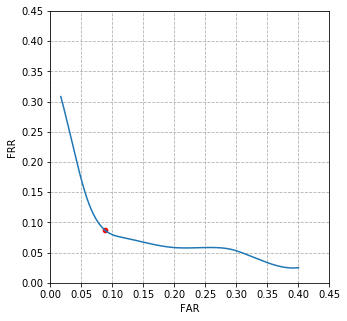

In [173]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import scipy.interpolate as spi
from scipy.signal import savgol_filter
from scipy.interpolate import make_interp_spline, BSpline

def ROCCurve(FAR,FRR):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    axis_min = min(FAR[0],FRR[-1])
    plt.figure(num=3, figsize=(5, 5))
#     plt.scatter(FAR, FRR, c='g', s=20, alpha=0.5)
    
    plt.xlim(0, 0.3)
    plt.ylim(0, 0.3)

    my_x_ticks = np.arange(0.0, 0.5, 0.05)
    my_y_ticks = np.arange(0.0, 0.5, 0.05)
    plt.xticks(my_x_ticks)
    plt.yticks(my_y_ticks)
    plt.grid(ls='--')
    plt.xlabel('FAR')
    plt.ylabel('FRR')



    # 300 represents number of points to make between T.min and T.max
    xnew = np.linspace(np.array(FAR).min(), np.array(FAR).max(), 5000) 
    spl = make_interp_spline(np.sort(np.array(FAR)), np.array(FRR), k=3)  # type: BSpline
    power_smooth = spl(xnew)  
    plt.plot(xnew,power_smooth)
#     plt.plot(FAR,FRR)
    
    i= 0
    while i< len(xnew):
        if abs(xnew[i]-power_smooth[i]) < 0.0001:
#             print(xnew[i], power_smooth[i])
#             print( 1- (xnew[i] + power_smooth[i])/2)
            EER = (xnew[i] + power_smooth[i])/2
            plt.scatter(xnew[i], power_smooth[i], c='r', s=20, alpha=0.8)
            print(EER)
        i += 1   
        

# FRR = [ 40.43,31.35,21.65, 11.20, 10.07, 8.14, 5.13, 4.51, 2.50, 1.63, ] 
# FAR = [ 0.32, 0.96, 1.91, 4.04, 4.46,   6.17,  8.51, 9.47, 16.49, 26.70,]
# FRR = [40.43, 31.35, 11.20, 10.07, 8.14, 4.51, 2.50, 1.63, ] 
# FAR = [ 0.32, 0.96, 4.04, 4.46,   6.17, 9.47, 16.49, 26.70,]
#  20.34, 4.17, 87.82 / 6.78, 11.67, 90.76 / 1.69, 40, 78.99
FRR = [30.83, 20.34, 14.17, 7.50, 5.83,5.83, 5.53, 5.00, 3.33, 2.50]
FAR = [1.67, 4.17, 5.83, 11.67, 20.00, 26.67, 29.17, 30.83, 35.00, 40.00]
FAR = [i/100 for i in FAR]
FRR = [i/100 for i in FRR]


ROCCurve(FAR,FRR)  